In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# Import and inspect the dat set
df = pd.read_csv('dataR2.csv')
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [4]:
# Check if there is any missing values
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [5]:
# Generate descriptive statistic of each predictor variable
df.describe(include='all')

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


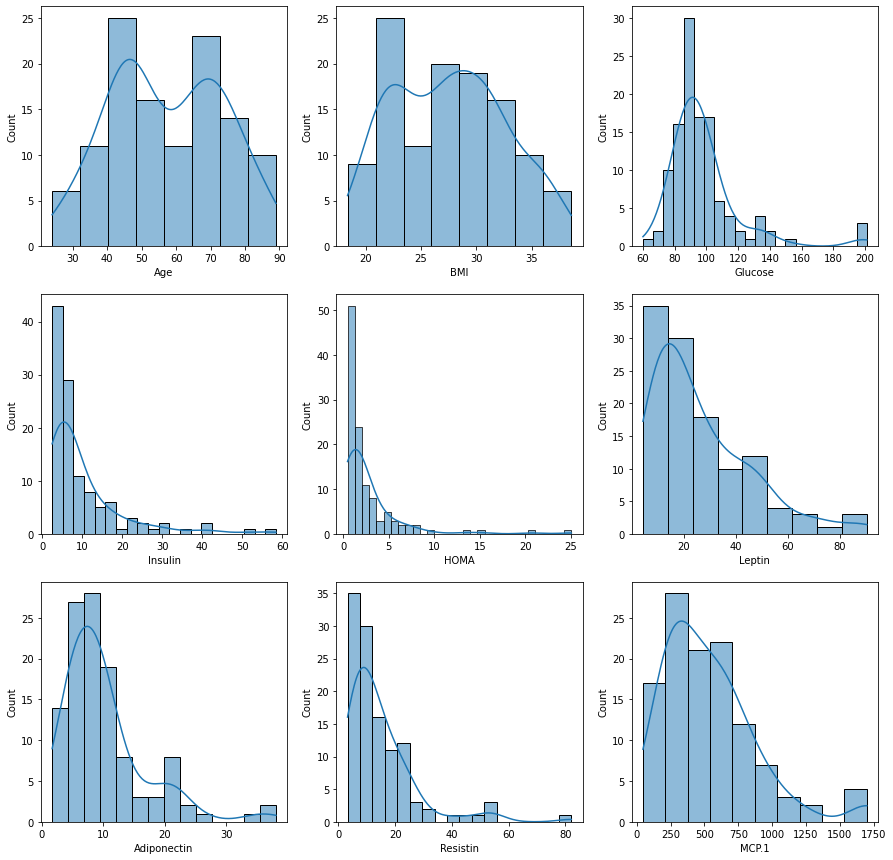

In [6]:
# Visualize the distribution of each predictor variable
colnames = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
fig, ax = plt.subplots(3, 3, figsize = (15,15))
for ax, c in zip(ax.flatten(), colnames):
    sns.histplot(data = df, x = c, kde = True, ax = ax)

<AxesSubplot:>

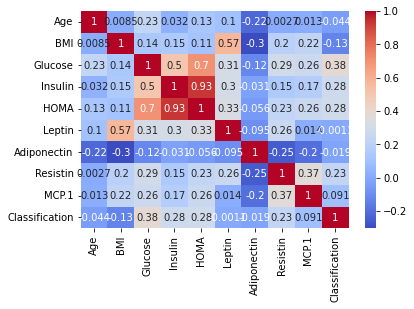

In [7]:
# Determine and visualize the correlation matrix 
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm')

In [8]:
# Pre-processing data set and apply standard scaler to all predictor variables
data = df.values[:,:9]
label = df.values[:,-1]

scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

# Replace all 1's with 0 and all 2's with 1 in the label array (where 0 indicate healthy controls and 1 indicates patients )
label = np.where(label == 1, 0, 1)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [9]:
# Split the data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 1)

# Building classification models and report the accuracy of each model
names = ['Logistic Regression', 'Random Forest', 'CART', 'SVM', 'Naive Bayes', 'KNN']
classifiers = [LogisticRegression(solver = 'liblinear', random_state = 1, max_iter = 1000),
               RandomForestClassifier(n_estimators = 100, random_state = 1),
               DecisionTreeClassifier(random_state = 1),
               SVC(kernel = 'rbf', gamma = 'auto'),
               GaussianNB(), 
               KNeighborsClassifier(n_neighbors = 3)]

# Iterate through each classifiers and calculate the testing accuracy
for name, clf in zip(names,classifiers):
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    matched_test = (y_test == y_pred)
    acc_test = sum(matched_test)/len(matched_test)*100
    print('The testing accuracy for the {} classifier is {}%'.format(name,acc_test))
    
# The three most potential classification model to use are Logistic Regression, Random Forest and CART

The testing accuracy for the Logistic Regression classifier is 75.0%
The testing accuracy for the Random Forest classifier is 62.5%
The testing accuracy for the CART classifier is 66.66666666666666%
The testing accuracy for the SVM classifier is 25.0%
The testing accuracy for the Naive Bayes classifier is 41.66666666666667%
The testing accuracy for the KNN classifier is 45.83333333333333%


In [41]:
# Using cross-validation and Grid search to obtain the best hyperparameter for Logistic Regression model
param_grid_LG = {
    'C': np.logspace(-5,4,10),
    'penalty': ['l1','l2'],
    'solver': ['liblinear'],
    }
LG = LogisticRegression(max_iter = 100)
grid = GridSearchCV(LG, param_grid_LG, cv = 5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.782608695652174


In [11]:
# Using cross-validation and Grid search to obtain the best hyperparameter for Random Forest model
param_grid_RF = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': np.linspace(1,100,100).astype(int),
    'max_depth': np.linspace(1,10,10).astype(int),
    'max_features': ['sqrt', 'log2'],
    }
RF = RandomForestClassifier()
grid = GridSearchCV(RF, param_grid_RF, cv = 5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 15}
Best score: 0.8043478260869565


In [13]:
# Using cross-validation and Grid search to obtain the best hyperparameter for CART model
param_grid_CART = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.linspace(1,100,100).astype(int),
    'min_samples_split': np.linspace(2,10,10).astype(int),
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

CART = DecisionTreeClassifier()
grid = GridSearchCV(CART, param_grid_CART, cv = 5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 6}
Best score: 0.7065217391304348


In [15]:
# Using cross-validation and Grid search to obtain the best hyperparameter for SVM model
param_grid_SVM = {
    'C': [0.01,0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}
svm = SVC()
grid = GridSearchCV(svm, param_grid_SVM, cv = 5)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'C': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Best score: 0.7608695652173914


-----Classification report for tuned Random Forest classifier-----
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.88      0.78      0.82        18

    accuracy                           0.75        24
   macro avg       0.69      0.72      0.70        24
weighted avg       0.78      0.75      0.76        24



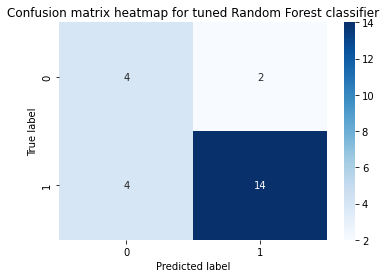

In [55]:
# Using random forest model to evaluate the final test set
RF = RandomForestClassifier(criterion = 'entropy', max_depth = 9, max_features = 'sqrt', n_estimators = 15)
y_pred = RF.fit(X_train, y_train).predict(X_test)
matched_test = (y_test == y_pred)
acc_test = sum(matched_test)/len(matched_test)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('-----Classification report for tuned Random Forest classifier-----'.format(name))
print(report)
    
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Confusion matrix heatmap for tuned Random Forest classifier'.format(name))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()